In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from causalchamber.datasets import Dataset

# Download the dataset and store it in starcaster disk
dataset = Dataset('wt_changepoints_v1', root='/mnt/starcaster/data/causal_chambers/', download=True)


Dataset wt_changepoints_v1 found in "/mnt/starcaster/data/causal_chambers/wt_changepoints_v1".


In [5]:
def plot_window(X, names, future_start=100, future_end=200, time_start=0):

    fig, axes = plt.subplots(len(names), 1)
    
    for i, variable in enumerate(names):
        axis = axes[int(i % len(names))]
        axis.axvline(future_start, color='gray', linestyle=':')

        axis.plot(range(time_start, future_start), X[variable][time_start:future_start], color=(1, 0, 0))
        axis.plot(range(future_start, future_end), X[variable][future_start:future_end], color=(0, 0, 1))

        axis.set_xlim([time_start, future_end])
        axis.set_ylabel(variable)

    axis.set_xlabel("Time index $t$")
    
    plt.show()

In [7]:
seed = 6
experiment = dataset.get_experiment(name=f'load_in_seed_{seed}')
observations = experiment.as_pandas_dataframe()

In [8]:
observations.columns

Index(['timestamp', 'config', 'counter', 'flag', 'intervention', 'hatch',
       'pot_1', 'pot_2', 'osr_1', 'osr_2', 'osr_mic', 'osr_in', 'osr_out',
       'osr_upwind', 'osr_downwind', 'osr_ambient', 'osr_intake', 'v_1', 'v_2',
       'v_mic', 'v_in', 'v_out', 'load_in', 'load_out', 'current_in',
       'current_out', 'res_in', 'res_out', 'rpm_in', 'rpm_out',
       'pressure_upwind', 'pressure_downwind', 'pressure_ambient',
       'pressure_intake', 'mic', 'signal_1', 'signal_2'],
      dtype='object')

In [9]:
changepoints = list(observations[observations.intervention==1].index)
print(changepoints)
print(len(observations.index))

[0, 213, 399, 517, 686, 910, 1014, 1289, 1560, 1668]
1929


In [10]:
observations['pressure_gap'] = observations['pressure_downwind'] - observations['pressure_ambient']
observations['airflow'] = observations['rpm_in'] / 3000 * 0.052
observations['max_pressure'] = (observations['rpm_in'] / 3000 ) ** 2 * 74.82
# observations['airflow'] = observations['pressure_gap'] / (observations['rpm_in'] / 3000 * observations['max_pressure'] / 74.82) - observations['rpm_in'] / 3000 * 74.82
observations['pressure'] = (observations['rpm_in'] / 3000 ) ** 2 * 74.82 - observations['airflow'] / 0.052

1560 1668


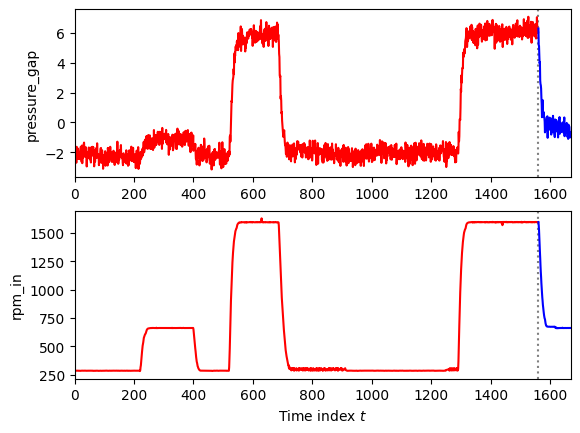

In [11]:
name = 'pressure_gap'

print(changepoints[-2], changepoints[-1])
plot_window(observations, [name, "rpm_in"], changepoints[-2], changepoints[-1])

213 399


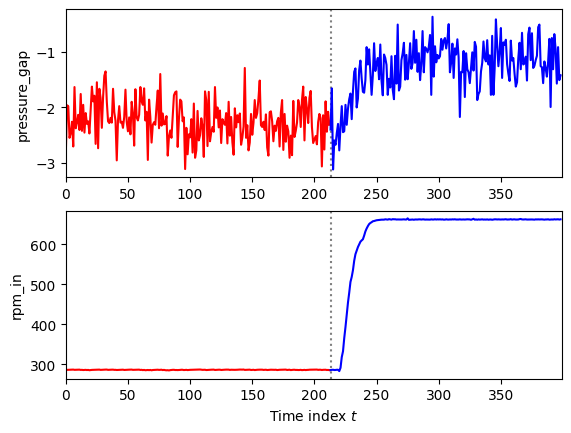

399 517


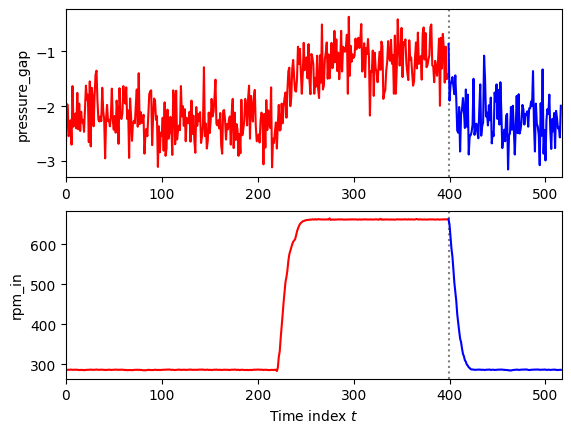

517 686


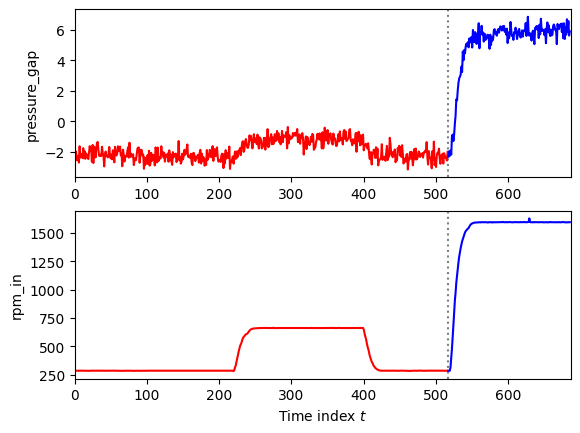

686 910


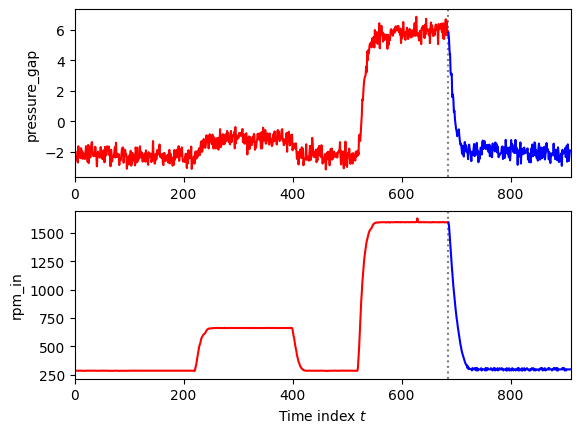

910 1014


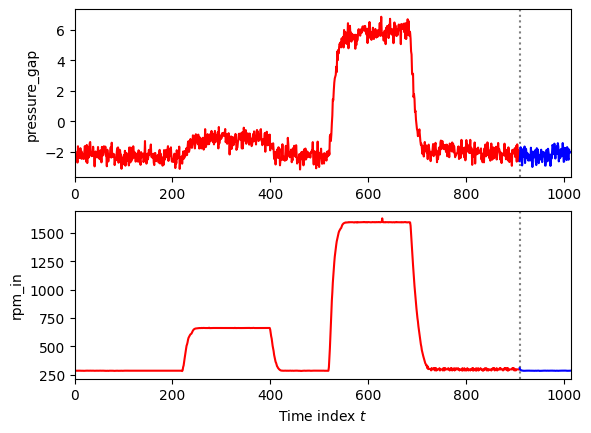

1014 1289


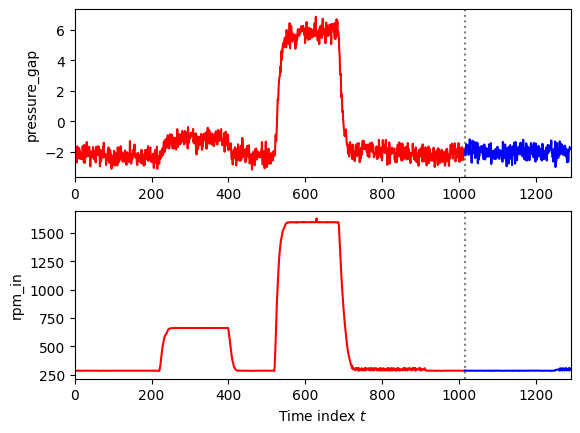

1289 1560


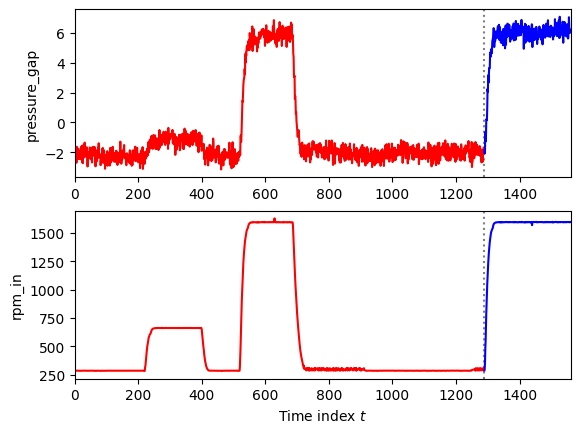

1560 1668


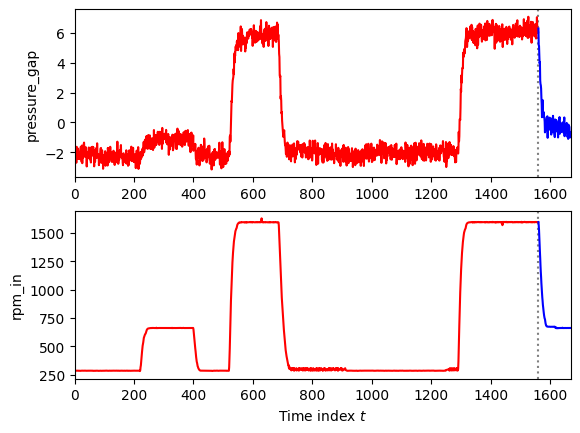

In [26]:
name = 'pressure_gap'

for i, c in enumerate(changepoints[1:-1]):
    print(c, changepoints[i+2])
    plot_window(observations, name, c, changepoints[i+2])

# Check implemented tasks

In [6]:
from benchmark.tasks.causal_chambers import SpeedFromLoadTask, ImplicitPressureFromSpeedTask, ExplicitPressureFromSpeedTask

In [7]:
task = SpeedFromLoadTask()

Dataset wt_changepoints_v1 found in "benchmark/data/wt_changepoints_v1".


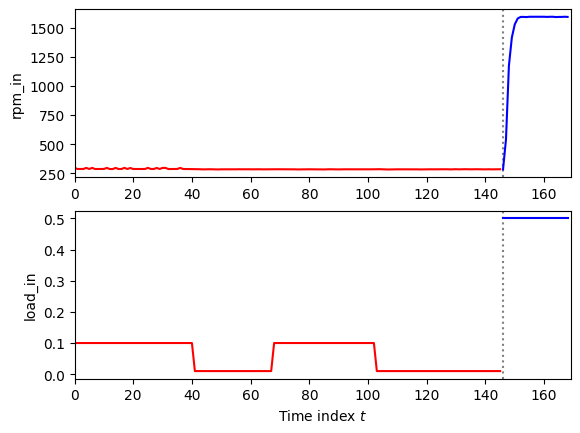

The load is set to: 0.1 until 05:30:23, 0.0 from 05:30:23 until 05:30:49, 0.1 from 05:30:49 until 05:31:26, 0.0 from 05:31:26 until 05:32:07, 0.5 from 05:32:07 until 05:32:30.


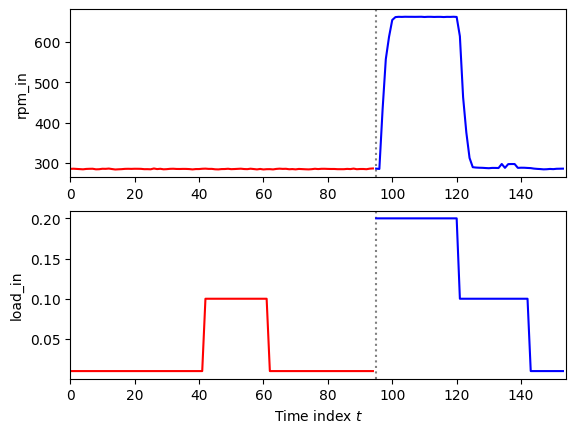

The load is set to: 0.0 until 05:47:09, 0.1 from 05:47:09 until 05:47:29, 0.0 from 05:47:29 until 05:48:01, 0.2 from 05:48:01 until 05:48:27, 0.1 from 05:48:27 until 05:48:49, 0.0 from 05:48:49 until 05:49:00.


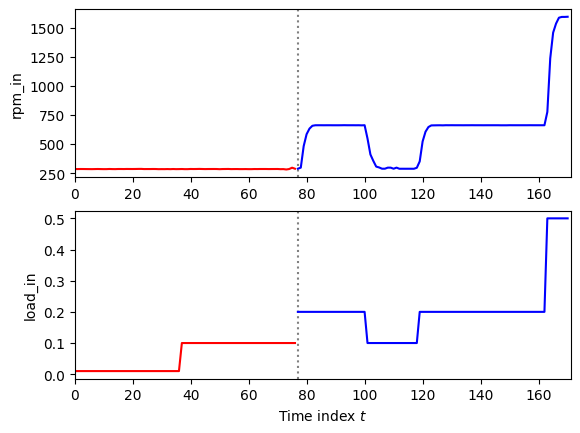

The load is set to: 0.0 until 05:25:04, 0.1 from 05:25:04 until 05:25:44, 0.2 from 05:25:44 until 05:26:07, 0.1 from 05:26:07 until 05:26:25, 0.2 from 05:26:25 until 05:27:09, 0.5 from 05:27:09 until 05:27:17.


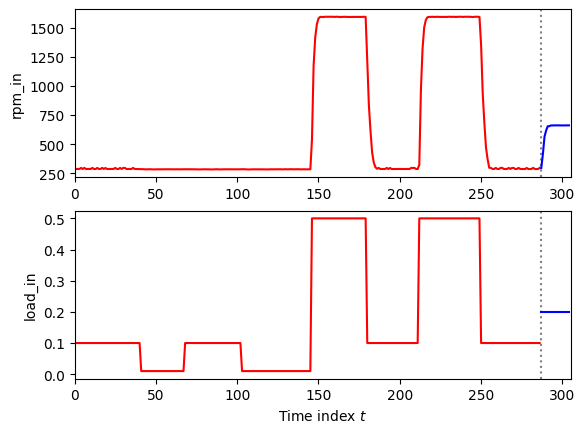

The load is set to: 0.1 until 05:30:23, 0.0 from 05:30:23 until 05:30:49, 0.1 from 05:30:49 until 05:31:26, 0.0 from 05:31:26 until 05:32:07, 0.5 from 05:32:07 until 05:32:42, 0.1 from 05:32:42 until 05:33:14, 0.5 from 05:33:14 until 05:33:52, 0.1 from 05:33:52 until 05:34:29, 0.2 from 05:34:29 until 05:34:46.


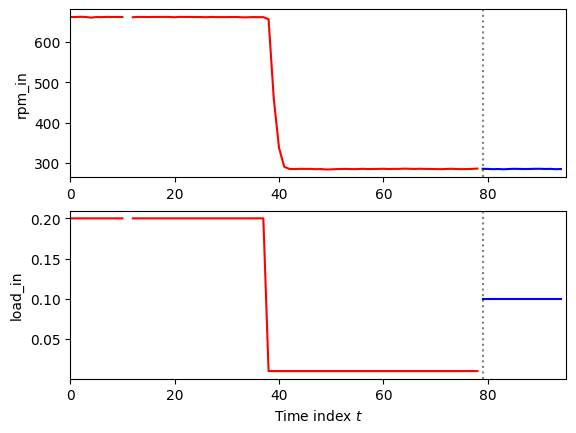

The load is set to: 0.2 until 05:36:27, 0.0 from 05:36:27 until 05:37:07, 0.1 from 05:37:07 until 05:37:22.


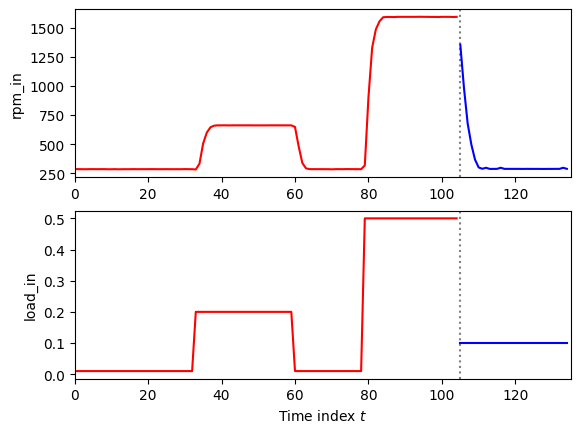

The load is set to: 0.0 until 05:41:49, 0.2 from 05:41:49 until 05:42:17, 0.0 from 05:42:17 until 05:42:35, 0.5 from 05:42:35 until 05:43:00, 0.1 from 05:43:00 until 05:43:30.


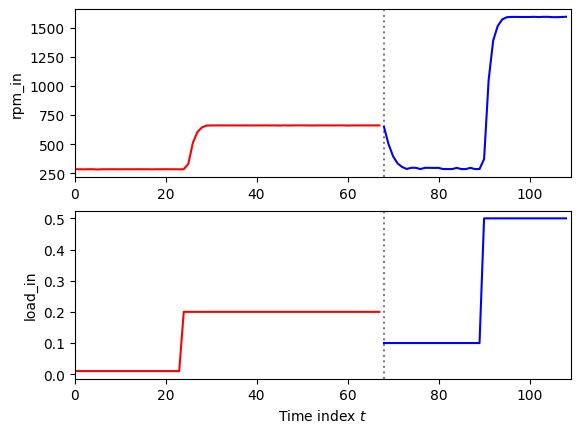

The load is set to: 0.0 until 05:18:52, 0.2 from 05:18:52 until 05:19:36, 0.1 from 05:19:36 until 05:19:57, 0.5 from 05:19:57 until 05:20:15.


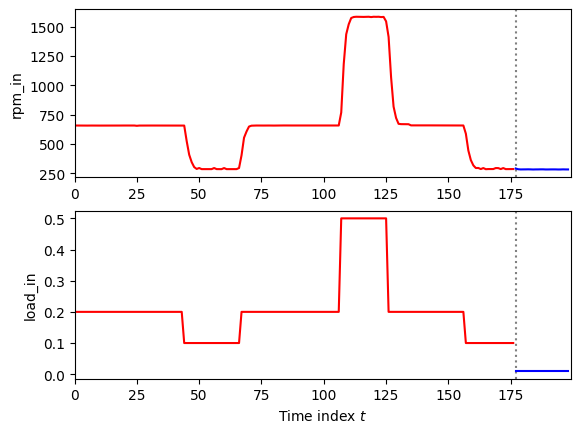

The load is set to: 0.2 until 05:08:34, 0.1 from 05:08:34 until 05:08:55, 0.2 from 05:08:55 until 05:09:36, 0.5 from 05:09:36 until 05:09:55, 0.2 from 05:09:55 until 05:10:26, 0.1 from 05:10:26 until 05:10:46, 0.0 from 05:10:46 until 05:11:07.


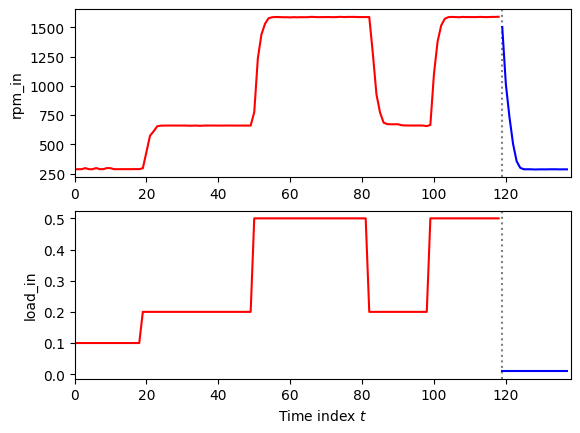

The load is set to: 0.1 until 05:13:52, 0.2 from 05:13:52 until 05:14:23, 0.5 from 05:14:23 until 05:14:56, 0.2 from 05:14:56 until 05:15:12, 0.5 from 05:15:12 until 05:15:32, 0.0 from 05:15:32 until 05:15:50.


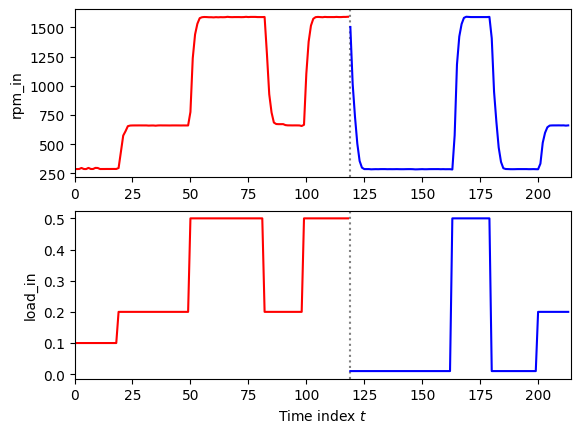

The load is set to: 0.1 until 05:13:52, 0.2 from 05:13:52 until 05:14:23, 0.5 from 05:14:23 until 05:14:56, 0.2 from 05:14:56 until 05:15:12, 0.5 from 05:15:12 until 05:15:32, 0.0 from 05:15:32 until 05:16:15, 0.5 from 05:16:15 until 05:16:32, 0.0 from 05:16:32 until 05:16:52, 0.2 from 05:16:52 until 05:17:06.


In [8]:
for i in range(10):
    window, past_time, future_time, covariates = task._get_instance_by_idx(i, '1s')
    plot_window(pd.concat((past_time, future_time)), ["rpm_in", "load_in"], future_start=len(past_time.index), future_end=len(past_time.index)+len(future_time.index), time_start=0)
    print(covariates)

Dataset wt_changepoints_v1 found in "benchmark/data/wt_changepoints_v1".


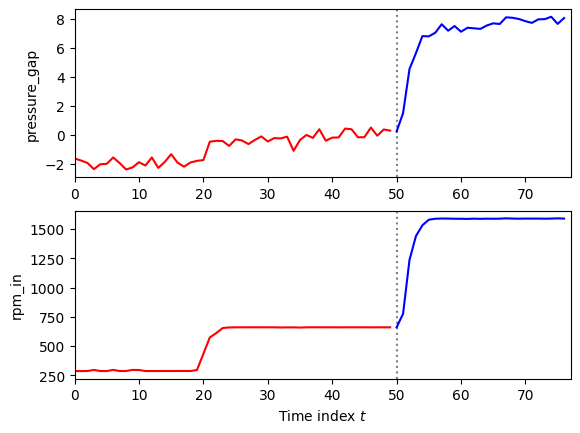

The speed starts at 308.0.At 05:13:52, it rapidly and smoothly changes to 660.5.At 05:14:23, it rapidly and smoothly changes to 1592.4.


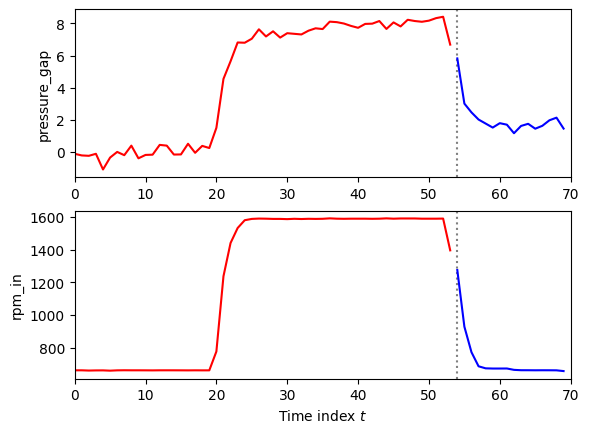

The speed starts at 661.0.At 05:14:23, it rapidly and smoothly changes to 1590.3.At 05:14:56, it rapidly and smoothly changes to 661.1.


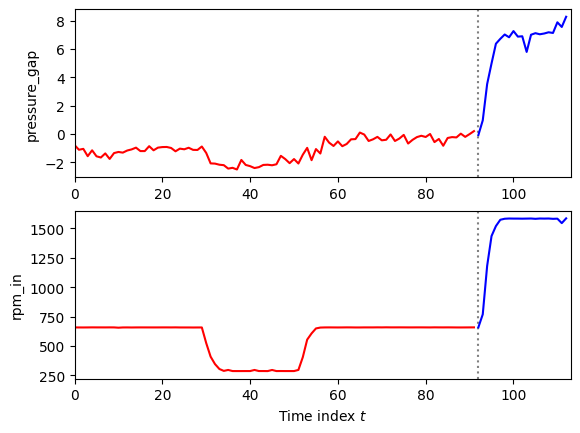

The speed starts at 657.9.At 05:08:34, it rapidly and smoothly changes to 306.7.At 05:08:55, it rapidly and smoothly changes to 658.1.At 05:09:36, it rapidly and smoothly changes to 1585.0.


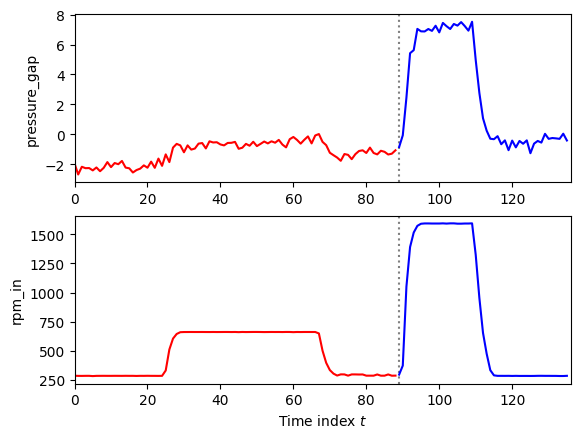

The speed starts at 286.1.At 05:18:52, it rapidly and smoothly changes to 661.1.At 05:19:36, it rapidly and smoothly changes to 296.6.At 05:19:57, it rapidly and smoothly changes to 1594.4.At 05:20:17, it rapidly and smoothly changes to 285.7.


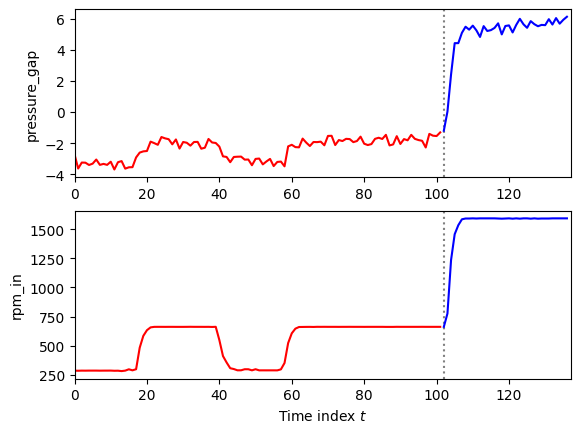

The speed starts at 285.3.At 05:25:44, it rapidly and smoothly changes to 661.8.At 05:26:07, it rapidly and smoothly changes to 297.6.At 05:26:25, it rapidly and smoothly changes to 661.8.At 05:27:09, it rapidly and smoothly changes to 1593.0.


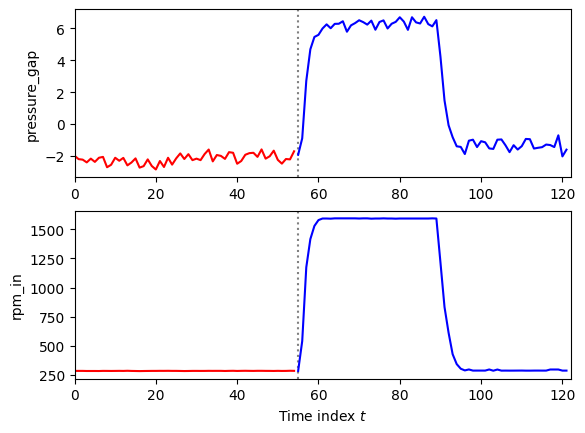

The speed starts at 285.5.At 05:31:26, it rapidly and smoothly changes to 285.9.At 05:32:07, it rapidly and smoothly changes to 1591.7.At 05:32:42, it rapidly and smoothly changes to 298.0.


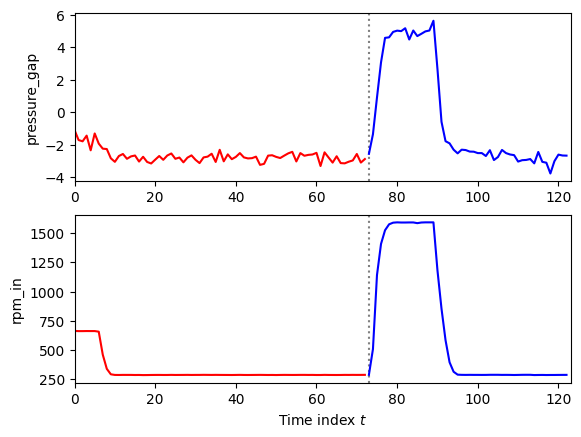

The speed starts at 662.4.At 05:36:27, it rapidly and smoothly changes to 286.6.At 05:37:07, it rapidly and smoothly changes to 286.4.At 05:37:32, it rapidly and smoothly changes to 1594.4.At 05:37:49, it rapidly and smoothly changes to 286.0.


In [9]:
task = ImplicitPressureFromSpeedTask()
for i in range(7):
    window, past_time, future_time, covariates = task._get_instance_by_idx(i, '1s')
    plot_window(pd.concat((past_time, future_time)), ["pressure_gap", "rpm_in"], future_start=len(past_time.index), future_end=len(past_time.index)+len(future_time.index), time_start=0)
    print(covariates)